<a href="https://colab.research.google.com/github/06081992/Machine-Learning-first-steps/blob/main/Copia_de_3_Maneras_de_Programar_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Maneras de Programar a una Red Neuronal - DOTCSV

## Código inicial

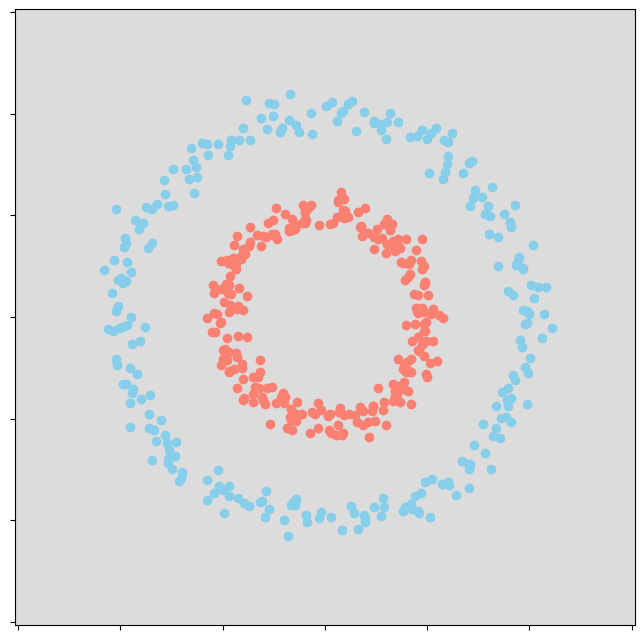

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

In [ ]:
import tensorflow as tf
from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:

  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())

  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):

    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })

    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:

      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)

      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)


# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):

  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

AttributeError: ignored

## Keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 3ms/step - loss: 0.2445 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2444 - acc: 0.5020
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2443 - acc: 0.5020
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2442 - acc: 0.5060
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2441 - acc: 0.5020
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2440 - acc: 0.5040
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2439 - acc: 0.5040
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2438 - acc: 0.5080
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2437 - acc: 0.5080
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2436 - acc: 0.5080
Epoch 11/100
16/16 [==============================] - 0s 2m

## Sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.16743888
Iteration 2, loss = 0.12511225
Iteration 3, loss = 0.12520878
Iteration 4, loss = 0.12522550
Iteration 5, loss = 0.12516585
Iteration 6, loss = 0.12511031
Iteration 7, loss = 0.12503753
Iteration 8, loss = 0.12502318
Iteration 9, loss = 0.12511910
Iteration 10, loss = 0.12506316
Iteration 11, loss = 0.12513546
Iteration 12, loss = 0.12518362
Iteration 13, loss = 0.12503342
Iteration 14, loss = 0.12504252
Iteration 15, loss = 0.12513930
Iteration 16, loss = 0.12507250
Iteration 17, loss = 0.12507354
Iteration 18, loss = 0.12504248
Iteration 19, loss = 0.12504110
Iteration 20, loss = 0.12509640
Iteration 21, loss = 0.12503969
Iteration 22, loss = 0.12506480
Iteration 23, loss = 0.12511889
Iteration 24, loss = 0.12503337
Iteration 25, loss = 0.12508838
Iteration 26, loss = 0.12508012
Iteration 27, loss = 0.12516958
Iteration 28, loss = 0.12512026
Iteration 29, loss = 0.12504961
Iteration 30, loss = 0.12504817
Iteration 31, loss = 0.12513296
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)